In [1]:
#  Multiple Linear Regression
# =============================================================================

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# =============================================================================
# # Importing the dataset
# =============================================================================

os.chdir('G:\python with machine learning\Linear Regression\section 2')
path_data = os.getcwd()
weather_data = pd.read_csv('WeatherHistory.csv')
weather_data.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [3]:
corr=weather_data.corr()
display(corr)
Cat=weather_data.describe(include=['O'])# describes all  categorical data
display(Cat)

All=weather_data.describe(include='all')# describes all numerical and  categorical data
display(All)

weather_data.head(3)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 05:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 05:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


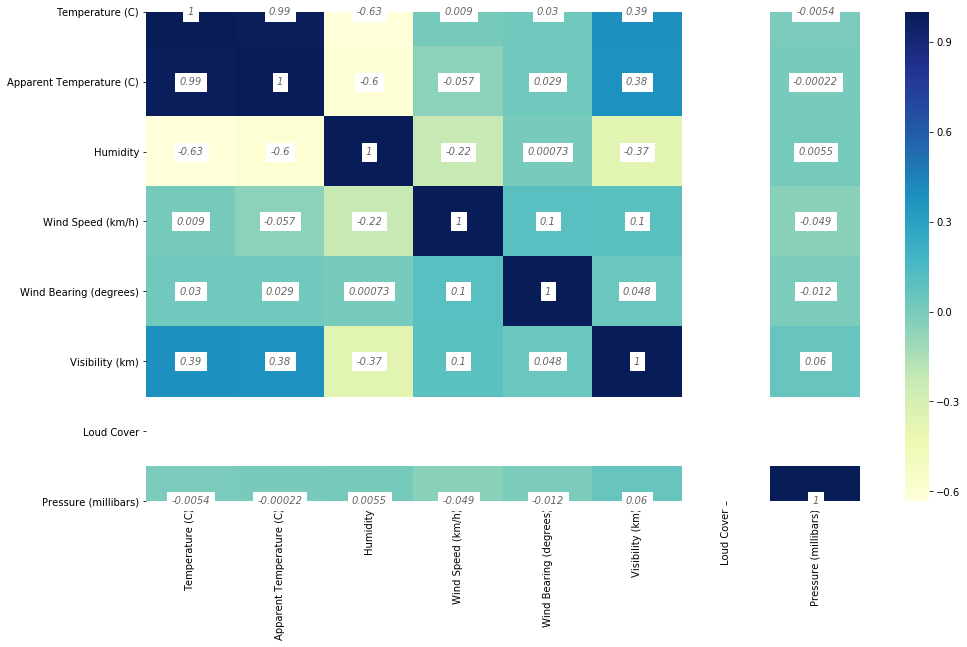

In [4]:
plt.figure(figsize=(16,9))
annot_kws={'fontsize':10, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':0.6, 
           'rotation':"horizontal",
           'verticalalignment':'center',
           'backgroundcolor':'w'}
sns.heatmap(corr,cmap="YlGnBu", annot = True, annot_kws= annot_kws)

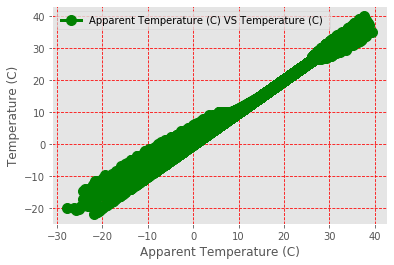

In [5]:
plt.style.use('ggplot')
plt.grid(color="r", linestyle="--")
plt.plot(weather_data.iloc[: , 4], weather_data.iloc[: , 3],"go-", linewidth=3, markersize=10, label="Apparent Temperature (C) VS Temperature (C) ")
plt.xlabel("Apparent Temperature (C)")
plt.ylabel("Temperature (C)")
plt.legend(loc=0)
plt.show()

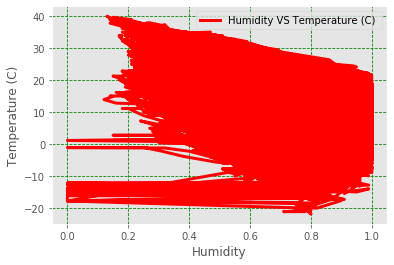

In [8]:
plt.style.use('ggplot')
plt.grid(color="g", linestyle="--")
plt.plot(weather_data.iloc[: , 5], weather_data.iloc[: , 3],"r-", linewidth=3, markersize=10, label="Humidity VS Temperature (C) ")
plt.xlabel("Humidity")
plt.ylabel("Temperature (C)")
plt.legend(loc=0)
plt.show()

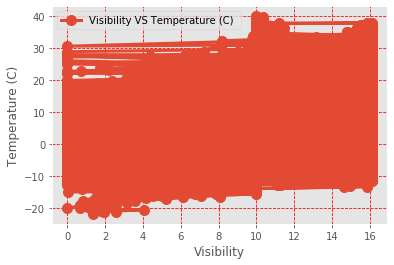

In [9]:
plt.style.use('ggplot')
plt.grid(color="r", linestyle="--")
plt.plot(weather_data.iloc[: , 8], weather_data.iloc[: , 3],"o-", linewidth=3, markersize=10, label="Visibility VS Temperature (C) ")
plt.xlabel("Visibility")
plt.ylabel("Temperature (C)")
plt.legend(loc=0)
plt.show()

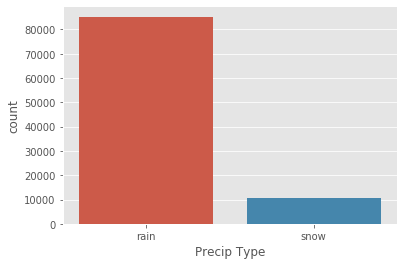

In [7]:
sns.countplot(data=weather_data, x = 'Precip Type')

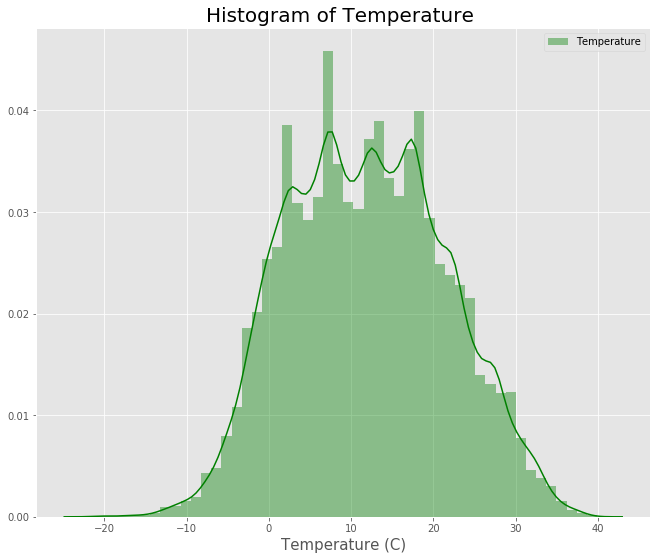

In [55]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.distplot( weather_data["Temperature (C)"] , color="g", label="Temperature")
plt.title("Histogram of Temperature ", fontsize = 20)
plt.xlabel("Temperature (C)", fontsize = 15)
plt.legend()
plt.show()

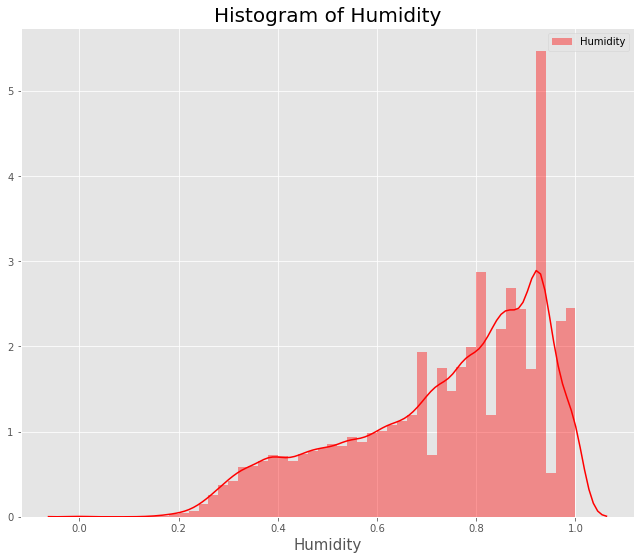

In [54]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.distplot( weather_data["Humidity"] , color="r", label="Humidity")
plt.title("Histogram of Humidity", fontsize = 20)
plt.xlabel("Humidity", fontsize = 15)
plt.legend()
plt.show()

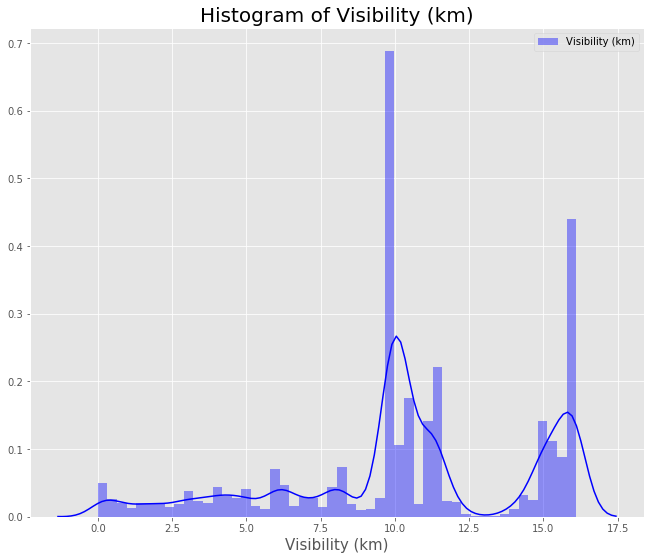

In [56]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.distplot( weather_data["Visibility (km)"] , color="b",label="Visibility (km)")
plt.title("Histogram of Visibility (km)", fontsize = 20)
plt.xlabel("Visibility (km)", fontsize = 15)
plt.legend()
plt.show()

In [8]:
data_set=weather_data.iloc[:,[2,3,4,5,8]]
Cor_s=data_set.corr()
display(Cor_s)
display(data_set.head())

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
Temperature (C),1.000000,0.992629,-0.632255,0.392847
Apparent Temperature (C),0.992629,1.000000,-0.602571,0.381718
Humidity,-0.632255,-0.602571,1.000000,-0.369173
Visibility (km),0.392847,0.381718,-0.369173,1.000000


,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
0,rain,9.472222,7.388889,0.89,15.8263
1,rain,9.355556,7.227778,0.86,15.8263
2,rain,9.377778,9.377778,0.89,14.9569
3,rain,8.288889,5.944444,0.83,15.8263
4,rain,8.755556,6.977778,0.83,15.8263


(96453, 5)

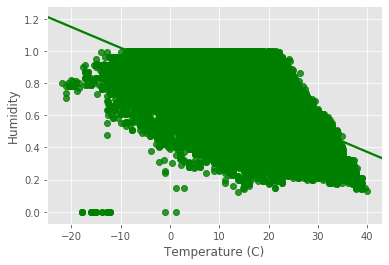

In [9]:
# plotting a scatter plot between temp and humdity
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Humidity"], color="g")
data_set.shape

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


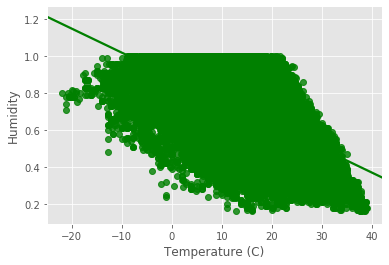

In [10]:


# Outlier Indetification and Removal based on Z-Score
# =============================================================================

outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_data = detect_outlier(data_set["Humidity"])
print (outlier_data)

#Removing the Outliers
data_set = data_set[data_set["Humidity"]>0.15]

# Again plotting a scatter plot between temp and humdity
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Humidity"], color='g')


In [22]:
data_set.iloc[ : , 0]

0        rain
1        rain
2        rain
3        rain
4        rain
         ... 
96448    rain
96449    rain
96450    rain
96451    rain
96452    rain
Name: Precip Type, Length: 96415, dtype: object

In [11]:
data_set.shape
#Omitted Rows
print(96453-96415)

38


In [12]:
data_set.isnull().sum(axis=0)

Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Visibility (km)               0
dtype: int64

In [13]:
print(data_set['Precip Type'].value_counts())

rain    85207
snow    10691
Name: Precip Type, dtype: int64


In [14]:
data_set['Precip Type'].replace(np.nan, 'rain', inplace= True)

In [15]:
data_set.isnull().sum(axis=0)

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Visibility (km)             0
dtype: int64

In [16]:
data_set.head(2)

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
0,rain,9.472222,7.388889,0.89,15.8263
1,rain,9.355556,7.227778,0.86,15.8263


In [17]:
# =============================================================================
# Creating the Independendent and Dependent Data Sets
# =============================================================================
y= data_set.iloc[:,[1]] # Dependent Data
#correlation between temp. and visibility is less , so visibility is  not an important feature.
X= data_set.iloc[:,[0,2,3]] #Feature Data
X.head()

,Precip Type,Apparent Temperature (C),Humidity
0,rain,7.388889,0.89
1,rain,7.227778,0.86
2,rain,9.377778,0.89
3,rain,5.944444,0.83
4,rain,6.977778,0.83


In [18]:
# Encoding categorical data
X=pd.get_dummies(X, columns =['Precip Type'])


In [19]:
X.head()

,Apparent Temperature (C),Humidity,Precip Type_rain,Precip Type_snow
0,7.388889,0.89,1,0
1,7.227778,0.86,1,0
2,9.377778,0.89,1,0
3,5.944444,0.83,1,0
4,6.977778,0.83,1,0


In [20]:
X= X.iloc[ : , [ 0, 1, 2]]
X.head(2)

,Apparent Temperature (C),Humidity,Precip Type_rain
0,7.388889,0.89,1
1,7.227778,0.86,1


In [21]:
# # Splitting the dataset into the Training set and Test set
# =============================================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [22]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
regressor.coef_

array([[ 0.8499004 , -2.66409082,  0.01433813,  0.29817497]])

In [41]:
regressor.intercept_

array([4.25194873])

In [23]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred_data=pd.DataFrame(y_pred)


In [43]:
regressor.score(X_train,y_train)


0.9873294798517503

In [24]:
regressor.score(X_test,y_test)


0.9870675263080302

In [25]:
#Root Mean Square Error
from sklearn import metrics
import math
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.0830842615031642


In [26]:
# =============================================================================
# #Model Statistics
# =============================================================================

#Adding Intercept term to the model
X_train=sm.add_constant(X_train) 
X_test=sm.add_constant(X_test)

#Converting into Dataframe
X_train_d=pd.DataFrame(X_train)

#Printing the Model Statistics
model = sm.OLS(y_pred,X_test).fit()
model.summary()

C:\Users\CTX\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.241e+32
Date:                Tue, 10 Mar 2020   Prob (F-statistic):               0.00
Time:                        10:06:24   Log-Likelihood:             5.7549e+05
No. Observations:               19283   AIC:                        -1.151e+06
Df Residuals:                   19279   BIC:                        -1.151e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.4177   1.15e-15   3.86e+15      0.000       4.418       4.418
Apparent Temperature (C)     0.8506   2.67e-17   3.18e+16      0.000       0.851       0.851
Humidity                    -2.7406   1.25e-15   -2.2e+15      0.000      -2.741      -2.741
Precip Type_rain             0.3334   7.43e-16   4.49e+14      0.000       0.333       0.333
==============================================================================
Omnibus:                      601.351   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.193
Skew:                           0.189   Prob(JB):                     6.10e-79
Kurtosis:                       2.448   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Checking the VIF Value

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(X_train_d.values, j) for j in range(X_train_d.shape[1])]
vif["features"] = X_train_d.columns
vif.round(1)

,VIF Factor,features
0,35.8,const
1,2.3,Apparent Temperature (C)
2,1.6,Humidity
3,1.5,Precip Type_rain


In [28]:
#Storing Coefficients in DataFrame along with coloumn names
coefficients = pd.concat([pd.DataFrame(X_train_d.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)

display(coefficients)

,0,0
0,const,0.850614
1,Apparent Temperature (C),-2.740597
2,Humidity,0.333378
3,Precip Type_rain,NaN


ValueError: Input passed into argument "'y1'"is not 1-dimensional.

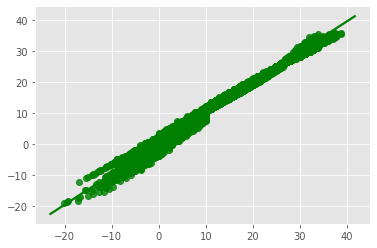

In [36]:
# plotting a scatter plot between Temperature predicted and Actual profit
sns.regplot(x=y_test, y=y_pred, color='g')


Text(0, 0.5, 'Frequency')

<Figure size 1152x648 with 0 Axes>

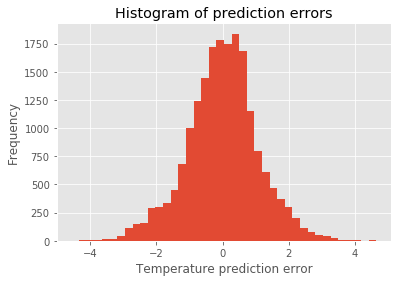

In [34]:
diff = y_test - y_pred
plt.figure(figsize =(16,9))
diff.hist(bins = 40)
plt.title('Histogram of prediction errors')
plt.xlabel('Temperature prediction error')
plt.ylabel('Frequency')